In [61]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
from pylab import rcParams
import matplotlib.pyplot as plt 
import warnings 
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.callbacks import EarlyStopping


In [15]:
zero_one_colourmap = ListedColormap(('red','green'))
warnings.filterwarnings("ignore")
rcParams['figure.figsize']=14,7
np.random.seed(800)

In [47]:
X,y = make_moons(n_samples=500,noise=0.2, random_state=1)

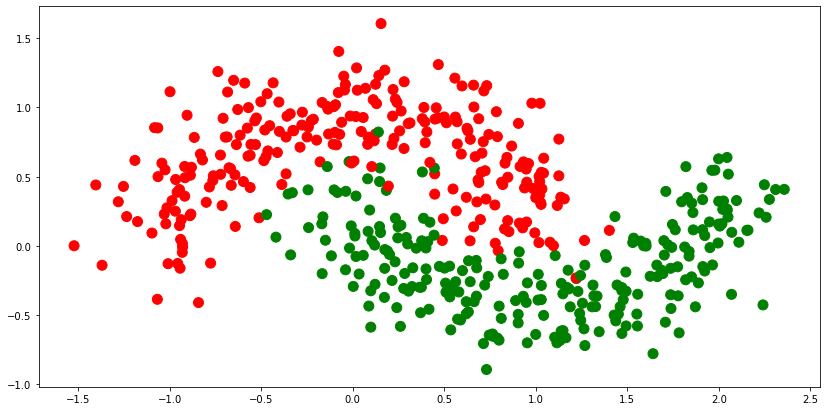

In [48]:
plt.scatter(X[:,0],X[:,1],
            c=y,s=100,
            cmap=zero_one_colourmap)
plt.show()

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [50]:
model = Sequential()
model.add(Dense(128,input_dim=2, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


In [51]:
history = model.fit(X_train,y_train,
                    validation_data=(X_test,y_test),
                    epochs=1000,verbose=2)

Train on 335 samples, validate on 165 samples
Epoch 1/1000
335/335 - 1s - loss: 0.6610 - accuracy: 0.6239 - val_loss: 0.6330 - val_accuracy: 0.7576
Epoch 2/1000
335/335 - 0s - loss: 0.5990 - accuracy: 0.8627 - val_loss: 0.5770 - val_accuracy: 0.8485
Epoch 3/1000
335/335 - 0s - loss: 0.5485 - accuracy: 0.8687 - val_loss: 0.5296 - val_accuracy: 0.8303
Epoch 4/1000
335/335 - 0s - loss: 0.5051 - accuracy: 0.8597 - val_loss: 0.4894 - val_accuracy: 0.8364
Epoch 5/1000
335/335 - 0s - loss: 0.4679 - accuracy: 0.8507 - val_loss: 0.4542 - val_accuracy: 0.8364
Epoch 6/1000
335/335 - 0s - loss: 0.4350 - accuracy: 0.8507 - val_loss: 0.4254 - val_accuracy: 0.8303
Epoch 7/1000
335/335 - 0s - loss: 0.4081 - accuracy: 0.8507 - val_loss: 0.3999 - val_accuracy: 0.8364
Epoch 8/1000
335/335 - 0s - loss: 0.3852 - accuracy: 0.8537 - val_loss: 0.3802 - val_accuracy: 0.8303
Epoch 9/1000
335/335 - 0s - loss: 0.3653 - accuracy: 0.8627 - val_loss: 0.3647 - val_accuracy: 0.8364
Epoch 10/1000
335/335 - 0s - loss: 0

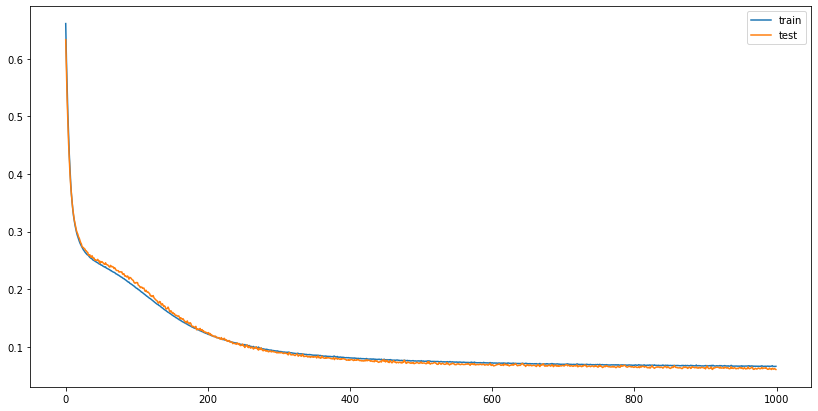

In [52]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

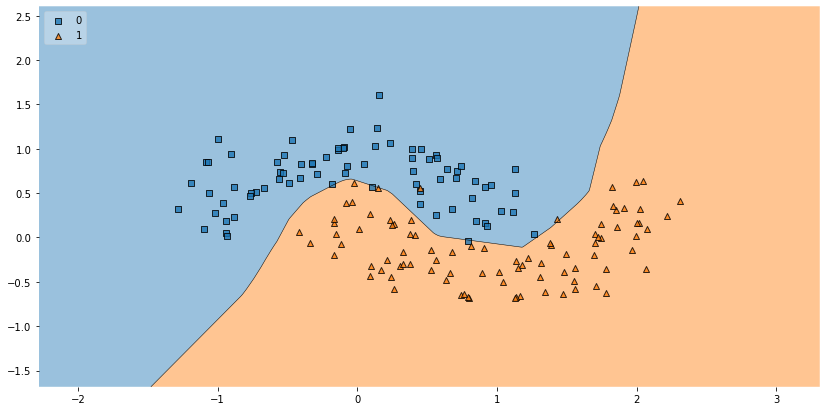

In [53]:
plot_decision_regions(X_test,y_test.ravel(), clf=model,legend=2)
plt.show()

In [55]:
reg_model = Sequential()
reg_model.add(Dense(128,input_dim=2, activation='relu'))
reg_model.add(Dense(1,activation='sigmoid'))
reg_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
# monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
#                         patience=5, verbose=1, mode='auto', 
#                         restore_best_weights=True)
# model.fit(x3_train,y3_train,validation_data=(x3_test,y3_test),
#           callbacks=[monitor],verbose=2,epochs=1000)

reg_history = reg_model.fit(X_train,y_train,
                            validation_data=(X_test,y_test),
                            epochs=4000,
                            callbacks=[EarlyStopping(monitor='val_loss')])

Train on 335 samples, validate on 165 samples
Epoch 1/4000
335/335 [==============================] - 1s 3ms/sample - loss: 0.6728 - accuracy: 0.6537 - val_loss: 0.6364 - val_accuracy: 0.7394
Epoch 2/4000
335/335 [==============================] - 0s 451us/sample - loss: 0.6208 - accuracy: 0.7612 - val_loss: 0.5883 - val_accuracy: 0.7818
Epoch 3/4000
335/335 [==============================] - 0s 323us/sample - loss: 0.5744 - accuracy: 0.7940 - val_loss: 0.5454 - val_accuracy: 0.7939
Epoch 4/4000
335/335 [==============================] - 0s 238us/sample - loss: 0.5327 - accuracy: 0.8000 - val_loss: 0.5068 - val_accuracy: 0.8121
Epoch 5/4000
335/335 [==============================] - 0s 239us/sample - loss: 0.4944 - accuracy: 0.8119 - val_loss: 0.4729 - val_accuracy: 0.8182
Epoch 6/4000
335/335 [==============================] - 0s 243us/sample - loss: 0.4610 - accuracy: 0.8209 - val_loss: 0.4423 - val_accuracy: 0.8121
Epoch 7/4000
335/335 [==============================] - 0s 402us/sam

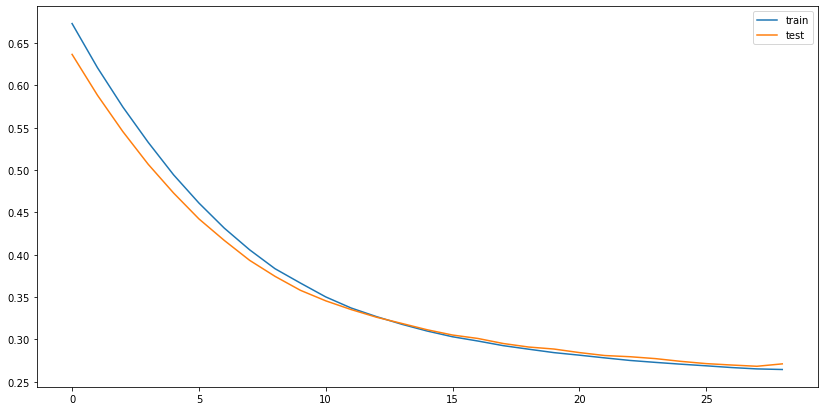

In [66]:
plt.plot(reg_history.history['loss'],label='train')
plt.plot(reg_history.history['val_loss'],label='test')
plt.legend()
plt.show()

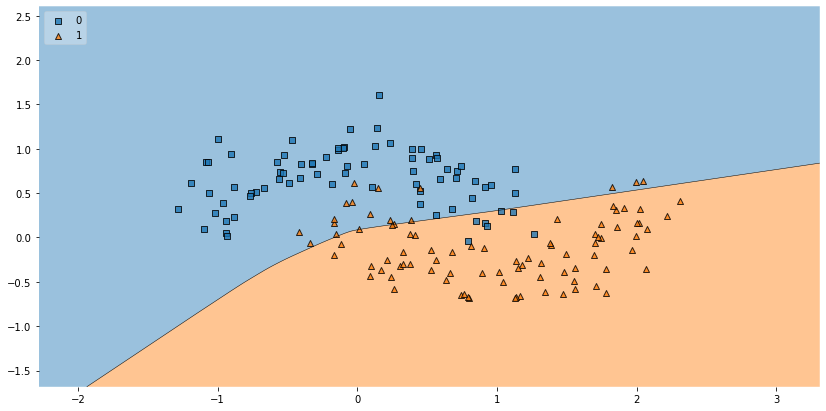

In [67]:
plot_decision_regions(X_test,y_test.ravel(), clf=reg_model,legend=2)
plt.show()